### Es 1
Hai a disposizione un file `data.csv` contenente dati mensili di passeggeri con due colonne:

- `date`: data in formato `YYYY-MM` (mese/anno)
- `passengers`: numero di passeggeri per quel mese


Costruisci un modello di **regressione polinomiale** che approssima l’andamento del numero di passeggeri nel tempo.

1. Carica il dataset.
2. Convertilo in un formato numerico utilizzando una colonna `mese_numerico` che conti i mesi a partire da gennaio 1949.
3. Applica una regressione polinomiale (grado a tua scelta).
4. Calcola l’RMSE tra i valori reali e quelli predetti.
5. Visualizza i dati reali e la curva stimata con Plotly.

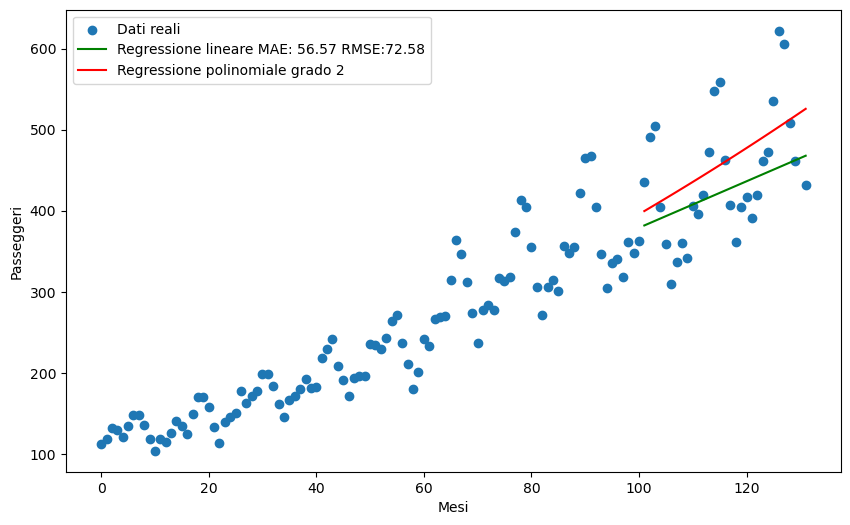

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error


df=pd.read_csv('data.csv')

df['mese_numerico']=range(len(df))

df=df.dropna(subset=['passengers'])
x=df[['mese_numerico']].values
y=df['passengers'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=30, shuffle=False)

reg_lin=LinearRegression()
reg_lin.fit(x_train,y_train)
y_pred_lin=reg_lin.predict(x_test)

model_poly2 = make_pipeline(PolynomialFeatures(2), LinearRegression())
model_poly2.fit(x_train, y_train)
y_pred_poly2 = model_poly2.predict(x_test)

mae_lin=mean_absolute_error(y_test,y_pred_lin)
mae_pol=mean_absolute_error(y_test,y_pred_poly2)
rmse_lin=root_mean_squared_error(y_test,y_pred_lin)
rmse_pol=root_mean_squared_error(y_test,y_pred_poly2)

fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(x, y, label='Dati reali')
ax.plot(x_test, y_pred_lin, color='green', label=f'Regressione lineare MAE:{mae_lin: .2f} RMSE:{rmse_lin:.2f}')
ax.plot(x_test, y_pred_poly2, color='red', label=f'Regressione polinomiale grado 2 MAE:{mae_pol:.2f} RMSE: {rmse_pol:.2f}')
ax.set_xlabel('Mesi')
ax.set_ylabel('Passeggeri')
ax.legend()
plt.show()

### Es2. 
Costruisci una web app con Dash che permette all’utente di scegliere il grado del polinomio per adattare un modello di regressione ai dati non lineari e vedere il risultato aggiornarsi dinamicamente.


1. Genera 100 punti x tra -3 e 3.

2. Calcola ad esempio y = x³ - x + rumore.

3. Costruisci un'interfaccia Dash con:
    - uno slider per scegliere il grado del polinomio (1–10),
    - un grafico Plotly che mostra i dati e la curva stimata.

4. Usa PolynomialFeatures + LinearRegression da scikit-learn per stimare la curva